In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from scipy.stats import cumfreq, t
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
#df_path = '/content/drive/MyDrive/ethereum/dataframe/dataset_v2.csv'
#df_path = '/content/drive/MyDrive/tópicos em computação - Glauber/dataframe/dataset_v2.csv'
df_path = '/content/drive/MyDrive/dataset_v2.csv'
df = pd.read_csv(df_path)
df['floor_price'].fillna(0, inplace=True)
df.isnull().sum()

total_volume     0
total_sales      0
total_supply     0
count            0
num_owners       0
average_price    0
num_reports      0
market_cap       0
floor_price      0
category         0
qtd_traits       0
qtd_editors      0
name_json        0
slug             0
dtype: int64

In [ ]:
df.describe()

,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,427788.000000,4.277880e+05,4.277880e+05,4.277880e+05,4.277880e+05,4.277880e+05,427788.000000,427788.000000,4.277880e+05,427788.000000,427788.000000
mean,8.663215,1.416060e+11,2.659265e+02,2.659265e+02,8.586781e+01,2.340873e+09,0.010776,2.446618,1.659843e+09,1.421856,1.036628
std,1016.935309,9.101152e+13,1.691232e+04,1.691232e+04,5.347439e+03,1.531060e+12,1.092297,278.194950,3.825509e+11,7.006031,0.482295
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,0.000000,0.000000e+00,1.300000e+01,1.300000e+01,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,613418.506984,5.952044e+16,9.707989e+06,9.707989e+06,1.641123e+06,1.001397e+15,700.000000,154168.124094,1.000000e+14,998.000000,92.000000


# 🎲 Filtro3: coleções sem atributos zerados
#### - Exceção de qtd_traits

In [ ]:
df_zeros3 = df[ (df['total_volume'] == 0) & (df['total_sales'] == 0) & (df['total_supply'] == 0)  & (df['num_owners'] == 0) & (df['average_price'] == 0)  & (df['num_reports'] == 0) & (df['market_cap'] == 0) & (df['floor_price'] == 0) ]
df_zeros3.describe()

,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.0,103621.000000,103621.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074232,1.005568
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.361727,0.099205
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.000000,13.000000


In [ ]:
s_all = set(df.index.to_list())
s_zeros = set(df_zeros3.index.to_list())
df_sel3 = df.iloc[ list(s_all - s_zeros) ]
df_sel3.describe()

,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,qtd_traits,qtd_editors
count,324167.000000,3.241670e+05,3.241670e+05,3.241670e+05,3.241670e+05,3.241670e+05,324167.000000,324167.000000,3.241670e+05,324167.000000,324167.000000
mean,11.432439,1.868708e+11,3.509308e+02,3.509308e+02,1.133157e+02,3.089140e+09,0.014221,3.228688,2.190417e+09,1.852628,1.046556
std,1168.203087,1.045505e+14,1.942746e+04,1.942746e+04,6.142681e+03,1.758822e+12,1.254770,319.575836,4.394586e+11,7.888314,0.550827
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
50%,0.000000,0.000000e+00,6.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,0.000000,0.000000e+00,2.000000e+01,2.000000e+01,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,1.000000
max,613418.506984,5.952044e+16,9.707989e+06,9.707989e+06,1.641123e+06,1.001397e+15,700.000000,154168.124094,1.000000e+14,998.000000,92.000000


In [ ]:
df_sel3.shape

(324167, 14)

# 🎲 Filtro extra
#### Remover atributos: total_sales, average_price, floor_price, market_cap porque apresentam muitos outliers
                    
#### Remover classes: domain-names e sports porque tem menos amostras e domain-names é muito disperso


In [ ]:
print(df_sel3['category'].value_counts())

art                    216568
pfps                    41464
photography             25613
memberships             11834
gaming                  10759
virtual-worlds           9442
music                    3441
sports-collectibles      2615
domain-names             2431
Name: category, dtype: int64


In [ ]:
# Lista de classes a serem removidas
classes_remover = ['domain-names', 'sports-collectibles']

# Remova as linhas onde 'category' está na lista de classes a serem removidas
df_filtrado = df_sel3.loc[~df['category'].isin(classes_remover)]

In [ ]:
df_filtrado.shape

(319121, 14)

In [ ]:
y = df_filtrado['category']
X = df_filtrado.drop(['category','name_json','slug', 'count', 'total_sales', 'average_price', 'floor_price', 'market_cap'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
print(f'Shape X_train: {X_train.shape} \nShape X_test: {X_test.shape}')

Shape X_train: (239340, 6) 
Shape X_test: (79781, 6)


In [ ]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
revocacao = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.6904902169689525
Precisão: 0.5741003469664538
Revocação: 0.6904902169689525
F1-Score: 0.5825232865737916


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           art       0.69      0.99      0.82     54178
        gaming       0.38      0.00      0.00      2667
   memberships       0.24      0.00      0.00      2838
         music       0.00      0.00      0.00       841
          pfps       0.63      0.13      0.22     10453
   photography       0.00      0.00      0.00      6447
virtual-worlds       0.00      0.00      0.00      2357

      accuracy                           0.69     79781
     macro avg       0.28      0.16      0.15     79781
  weighted avg       0.57      0.69      0.58     79781



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


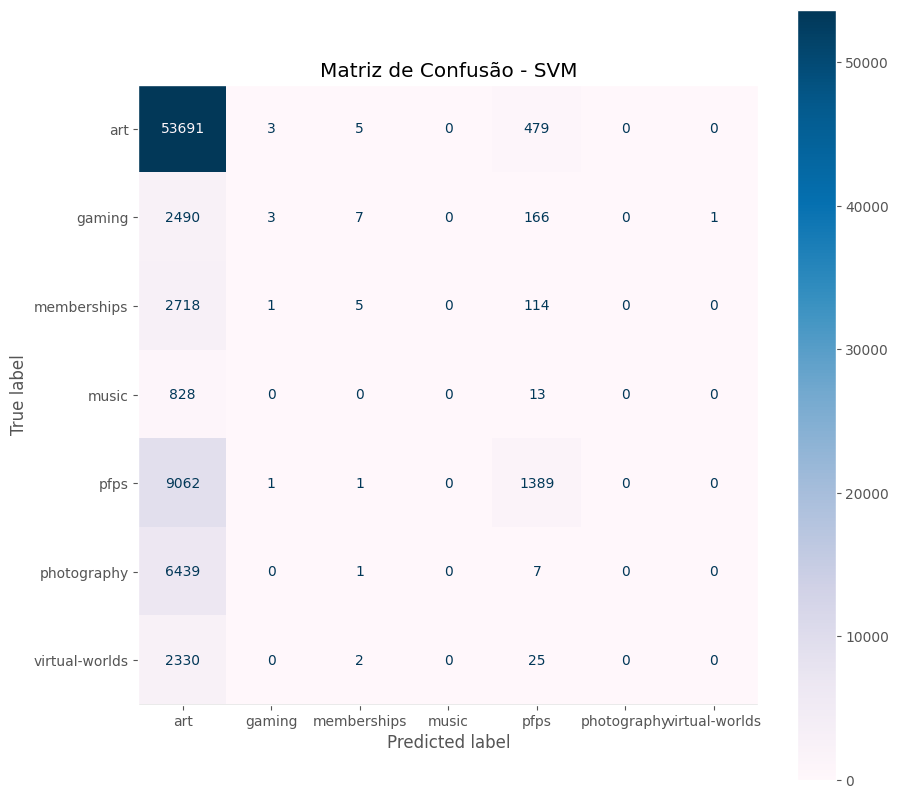

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - SVM')
plt.grid(False)
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'modeloMult_svm.sav')

['modeloMult_svm.sav']

In [ ]:
df = df.drop(['name_json','slug', 'count', 'total_sales', 'average_price', 'floor_price', 'market_cap'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0)

In [ ]:
df.shape

(427788, 8)

In [ ]:
df_binario = pd.concat([df[df['target'] == 0],
                        df[df['target'] == 1]])

df_binario = df_binario.sample(frac=1, random_state=42).reset_index(drop=True)
df_binario.shape

(427788, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features = df_binario.drop(columns=['target', 'category'])

# Inicialize o scaler MinMax
scaler = MinMaxScaler()

# Ajuste e transforme as features
features_normalized = scaler.fit_transform(features)

# Crie um novo DataFrame com as features normalizadas e a coluna 'target'
df_binario_normalized = pd.DataFrame(features_normalized, columns=features.columns)
df_binario_normalized['target'] = df_binario['target']

In [ ]:
# amostra = balanced_df.sample(n=100000, random_state=42)
amostra = df_binario_normalized
amostra.shape

(427788, 7)

In [ ]:
y = amostra['target'] # ----> caracteristicas (1 = art / 0 = não art)
X = amostra.drop(['target'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
print(f'Shape X_train: {X_train.shape} \nShape X_test: {X_test.shape}')

Shape X_train: (320841, 6) 
Shape X_test: (106947, 6)


In [ ]:
model1 = svm.SVC()
model1.fit(X_train, y_train)

SVC()

- Métricas

Acurácia: 0.5916575500014025

Precisão: 0.6411071922172052

Revocação: 0.5916575500014025

F1-Score: 0.4632893110474618

- Report das classes

precision    recall  f1-score   support

           0       0.71      0.04      0.08     44878
           1       0.59      0.99      0.74     62069

    accuracy                           0.59    106947
   macro avg       0.65      0.52      0.41    106947
weighted avg       0.64      0.59      0.46    106947





In [ ]:
y_pred = model1.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

In [ ]:
report = classification_report(y_test, y_pred)

print(report)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - SVM')
plt.grid(False)
plt.show()

In [ ]:
joblib.dump(model1, 'modeloArtxNoArt_svm.sav')

In [ ]:
df = pd.read_csv(df_path)
df.shape
# df.head()

(427788, 14)

In [ ]:
df = df.drop(['name_json','slug', 'count', 'total_sales', 'average_price', 'floor_price', 'market_cap'], axis = 1)
df['target'] = df['category'].apply(lambda x: 1 if x == 'art' else 0 if x == 'pfps' else None)

In [ ]:
df_binario = pd.concat([df[df['target'] == 0],
                        df[df['target'] == 1]])

df_binario = df_binario.sample(frac=1, random_state=42).reset_index(drop=True)
df_binario.shape

(292805, 8)

In [ ]:
features = df_binario.drop(columns=['target', 'category'])

# Inicialize o scaler MinMax
scaler = MinMaxScaler()

# Ajuste e transforme as features
features_normalized = scaler.fit_transform(features)

# Crie um novo DataFrame com as features normalizadas e a coluna 'target'
df_binario_normalized = pd.DataFrame(features_normalized, columns=features.columns)
df_binario_normalized['target'] = df_binario['target']

In [ ]:
amostra = df_binario_normalized
amostra.shape

(292805, 7)

In [ ]:
amostra

,total_volume,total_supply,num_owners,num_reports,qtd_traits,qtd_editors,target
0,0.0,6.169340e-07,6.177896e-07,0.0,0.000000,0.01087,0.0
1,0.0,6.786274e-06,6.177896e-07,0.0,0.000000,0.01087,1.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.01087,1.0
3,0.0,3.084670e-06,6.177896e-07,0.0,0.002004,0.01087,1.0
4,0.0,1.233868e-06,6.177896e-07,0.0,0.003006,0.01087,1.0
...,...,...,...,...,...,...,...
292800,0.0,6.169340e-06,6.177896e-07,0.0,0.009018,0.01087,1.0
292801,0.0,4.935472e-06,6.177896e-07,0.0,0.000000,0.01087,1.0
292802,0.0,1.850802e-06,6.177896e-07,0.0,0.000000,0.01087,1.0
292803,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.01087,1.0


In [ ]:
y = amostra['target'] # ----> caracteristicas (1 = art / 0 = pfps)
X = amostra.drop(['target'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
print(f'Shape X_train: {X_train.shape} \nShape X_test: {X_test.shape}')

Shape X_train: (219603, 6) 
Shape X_test: (73202, 6)


In [ ]:
model2 = svm.SVC()
model2.fit(X_train, y_train)

SVC()

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model2.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

Acurácia: 0.858501133848802
Precisão: 0.8503269131847088
Revocação: 0.858501133848802
F1-Score: 0.810776591406148


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.12      0.20     11336
         1.0       0.86      0.99      0.92     61866

    accuracy                           0.86     73202
   macro avg       0.83      0.56      0.56     73202
weighted avg       0.85      0.86      0.81     73202



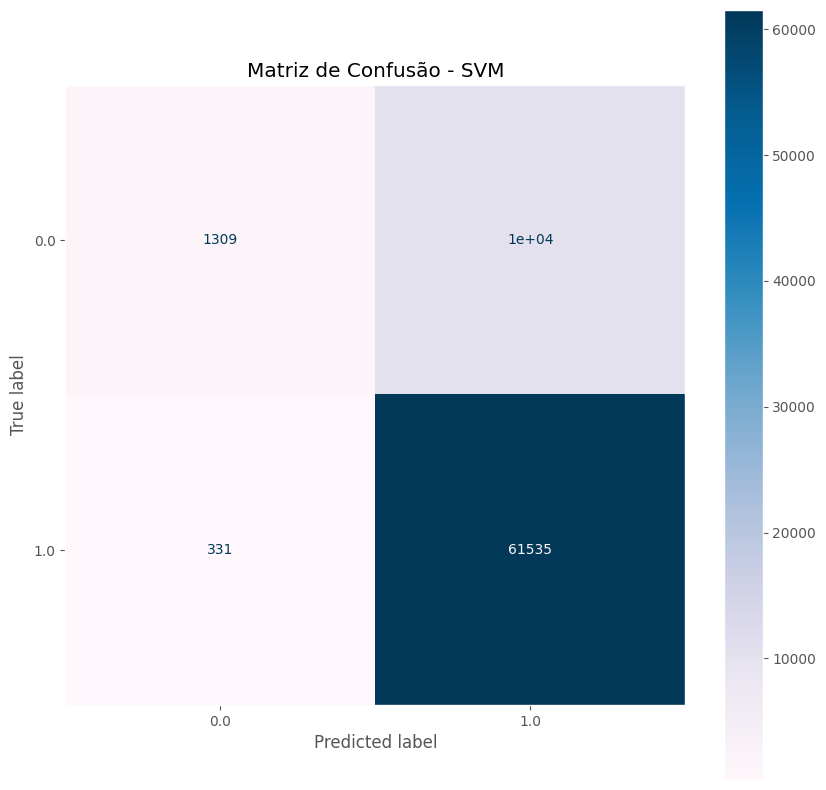

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - SVM')
plt.grid(False)
plt.show()

In [ ]:
joblib.dump(model2, 'modeloArtxPFPS_svm.sav')

['modeloArtxPFPS_svm.sav']

# 🎲 Filtro extra 2

#### * Usar apenas os atributos: total_volume, total_supply, num_owners, average_price, floor_price, qtd_traits

#### * Somar 10**-26 a todas as instâncias nos atributos que tenham instâncias zeradas

#### * Aplicar transformação logaritmica a todos os atributos

In [ ]:
df_filtrado = df_filtrado.drop(['name_json','num_reports','qtd_editors','slug', 'count', 'total_sales', 'market_cap'], axis = 1)

In [ ]:
df_filtrado.head()

,total_volume,total_supply,num_owners,average_price,floor_price,category,qtd_traits
0,0.0,9.0,1,0.0,0.0,art,3
2,0.0,1.0,1,0.0,0.0,art,0
4,6.0,3.0,3,2.0,0.0,photography,0
5,0.0,2500.0,1,0.0,0.0,art,4
6,0.0,20.0,1,0.0,0.0,art,8


In [ ]:
df_filtrado.describe()

,total_volume,total_supply,num_owners,average_price,floor_price,qtd_traits
count,319121.000000,3.191210e+05,3.191210e+05,3.191210e+05,3.191210e+05,319121.000000
mean,11.591918,3.483686e+02,1.101020e+02,3.137986e+09,2.225052e+09,1.855559
std,1177.388252,1.951259e+04,6.064426e+03,1.772673e+12,4.429193e+11,7.734583
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,0.000000,2.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,613418.506984,9.707989e+06,1.641123e+06,1.001397e+15,1.000000e+14,998.000000


In [ ]:
# Adicione o valor 10**-26 a todas as amostras nos atributos específicos
atributos = ['total_volume', 'total_supply', 'num_owners', 'average_price', 'floor_price', 'qtd_traits']
valor_adicional = 10**-26
df_filtrado[atributos] += valor_adicional

In [ ]:
df_filtrado.describe()

,total_volume,total_supply,num_owners,average_price,floor_price,qtd_traits
count,3.191210e+05,3.191210e+05,3.191210e+05,3.191210e+05,3.191210e+05,3.191210e+05
mean,1.159192e+01,3.483686e+02,1.101020e+02,3.137986e+09,2.225052e+09,1.855559e+00
std,1.177388e+03,1.951259e+04,6.064426e+03,1.772673e+12,4.429193e+11,7.734583e+00
min,1.000000e-26,1.000000e-26,1.000000e-26,1.000000e-26,1.000000e-26,1.000000e-26
25%,1.000000e-26,2.000000e+00,1.000000e+00,1.000000e-26,1.000000e-26,1.000000e-26
50%,1.000000e-26,7.000000e+00,1.000000e+00,1.000000e-26,1.000000e-26,1.000000e-26
75%,1.000000e-26,2.000000e+01,1.000000e+00,1.000000e-26,1.000000e-26,1.000000e+00
max,6.134185e+05,9.707989e+06,1.641123e+06,1.001397e+15,1.000000e+14,9.980000e+02


In [ ]:
# Aplicar a transformação logarítmica a toda a base de dados
df_filtrado_log = np.log(df_filtrado.drop(['category'], axis = 1))

In [ ]:
df_filtrado_log.head()

,total_volume,total_supply,num_owners,average_price,floor_price,qtd_traits
0,-59.867212,2.197225,0.000000,-59.867212,-59.867212,1.098612
2,-59.867212,0.000000,0.000000,-59.867212,-59.867212,-59.867212
4,1.791759,1.098612,1.098612,0.693147,-59.867212,-59.867212
5,-59.867212,7.824046,0.000000,-59.867212,-59.867212,1.386294
6,-59.867212,2.995732,0.000000,-59.867212,-59.867212,2.079442


In [ ]:
y = df_filtrado['category']
X = df_filtrado_log

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(f'Shape X_train: {X_train.shape} \nShape X_test: {X_test.shape}')

Shape X_train: (239340, 6) 
Shape X_test: (79781, 6)


In [ ]:
model3 = svm.SVC()
model3.fit(X_train, y_train)

SVC()

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model3.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.6945638685902659
Precisão: 0.5547542166139398
Revocação: 0.6945638685902659
F1-Score: 0.593010473184576


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

           art       0.70      0.99      0.82     54178
        gaming       0.00      0.00      0.00      2667
   memberships       0.00      0.00      0.00      2838
         music       0.00      0.00      0.00       841
          pfps       0.62      0.19      0.29     10453
   photography       0.00      0.00      0.00      6447
virtual-worlds       0.00      0.00      0.00      2357

      accuracy                           0.69     79781
     macro avg       0.19      0.17      0.16     79781
  weighted avg       0.55      0.69      0.59     79781



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


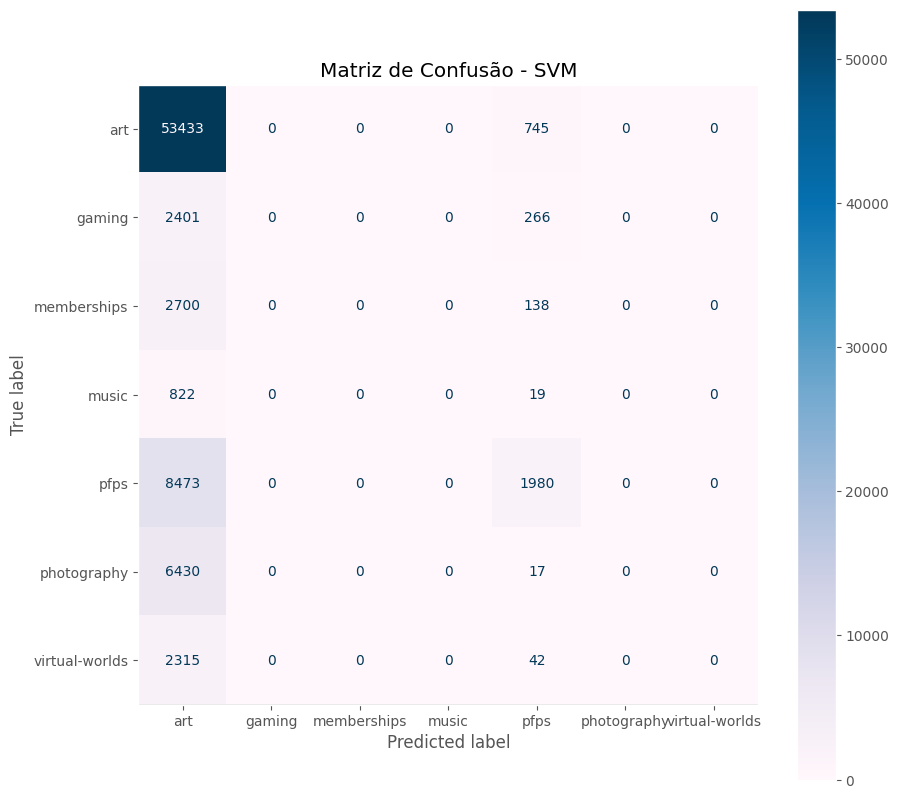

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - SVM')
plt.grid(False)
plt.show()

In [ ]:
joblib.dump(model3, 'modeloMultiFilter_svm.sav')

['modeloMultiFilter_svm.sav']

# 🧮 SVM 'art' x 'pfps' x 'outros' (Com filtro 2)

In [ ]:
df_ternario = df_filtrado
df_ternario['target'] = df_filtrado['category'].apply(lambda x: 'art' if x == 'art' else 'pfps' if x == 'pfps' else 'outros')

In [ ]:
y = df_ternario['target']
X = df_filtrado_log

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(f'Shape X_train: {X_train.shape} \nShape X_test: {X_test.shape}')

Shape X_train: (239340, 6) 
Shape X_test: (79781, 6)


In [ ]:
model4 = svm.SVC()
model4.fit(X_train, y_train)

SVC()

In [ ]:
# Fazer previsões no conjunto de teste usando o melhor modelo
y_pred = model4.predict(X_test)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')  # Precisão ponderada por classe
revocacao = recall_score(y_test, y_pred, average='weighted')  # Revocação ponderada por classe
f1 = f1_score(y_test, y_pred, average='weighted')  # F1-Score ponderado por classe

# Exibir as métricas de avaliação
print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Revocação:", revocacao)
print("F1-Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia: 0.6945513342775849
Precisão: 0.5548086740853398
Revocação: 0.6945513342775849
F1-Score: 0.5929839673246338


In [ ]:
report = classification_report(y_test, y_pred)

# Exibir o relatório de classificação
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.70      0.99      0.82     54178
      outros       0.00      0.00      0.00     15150
        pfps       0.62      0.19      0.29     10453

    accuracy                           0.69     79781
   macro avg       0.44      0.39      0.37     79781
weighted avg       0.55      0.69      0.59     79781



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


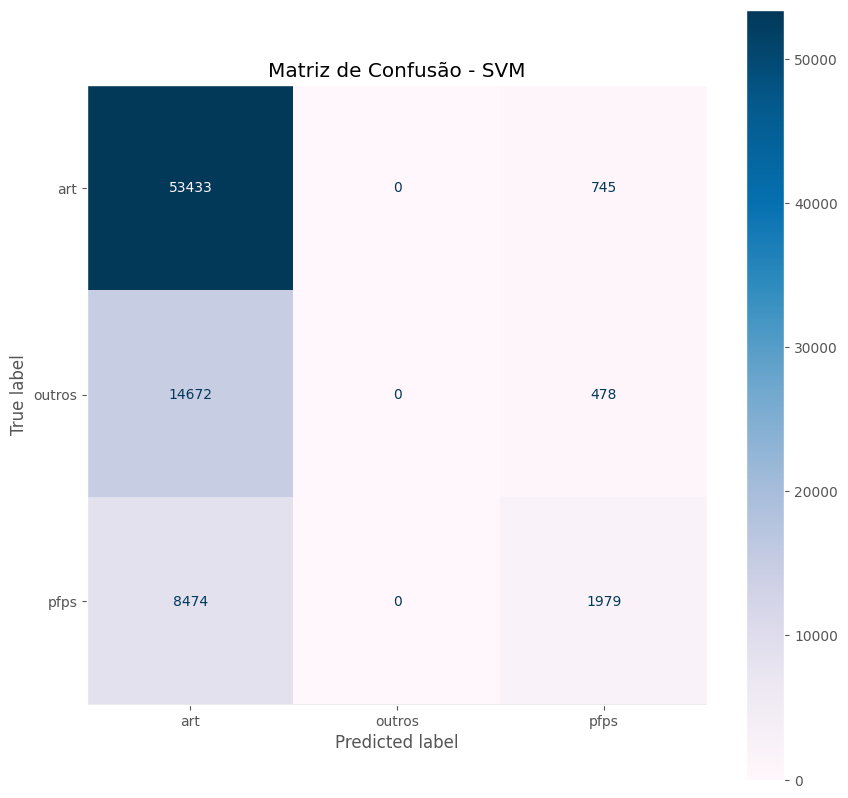

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=np.unique(y_test))
cmap = 'PuBu'

disp.plot(cmap=cmap)
plt.title('Matriz de Confusão - SVM')
plt.grid(False)
plt.show()

In [ ]:
joblib.dump(model4, 'modeloTernarioFilter_svm.sav')

['modeloTernarioFilter_svm.sav']